In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from windrose import WindroseAxes


In [8]:
df = pd.read_csv('data/benin-malanville.csv')

In [10]:
summary = df.describe()
print(summary)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [11]:
empty_values = df.isna().sum()
high_missing = empty_values[empty_values > (0.05 * len(df))]
print(high_missing)

Comments    525600
dtype: int64


In [5]:
print(df[['GHI', 'DNI', 'DHI']].isna().sum())

GHI    0
DNI    0
DHI    0
dtype: int64


In [12]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]))
df['clean_flag'] = (z_scores > 3).any(axis=1)

In [13]:
os.makedirs('data', exist_ok=True)

In [14]:
df.to_csv('data/benin_clean.csv', index=False)

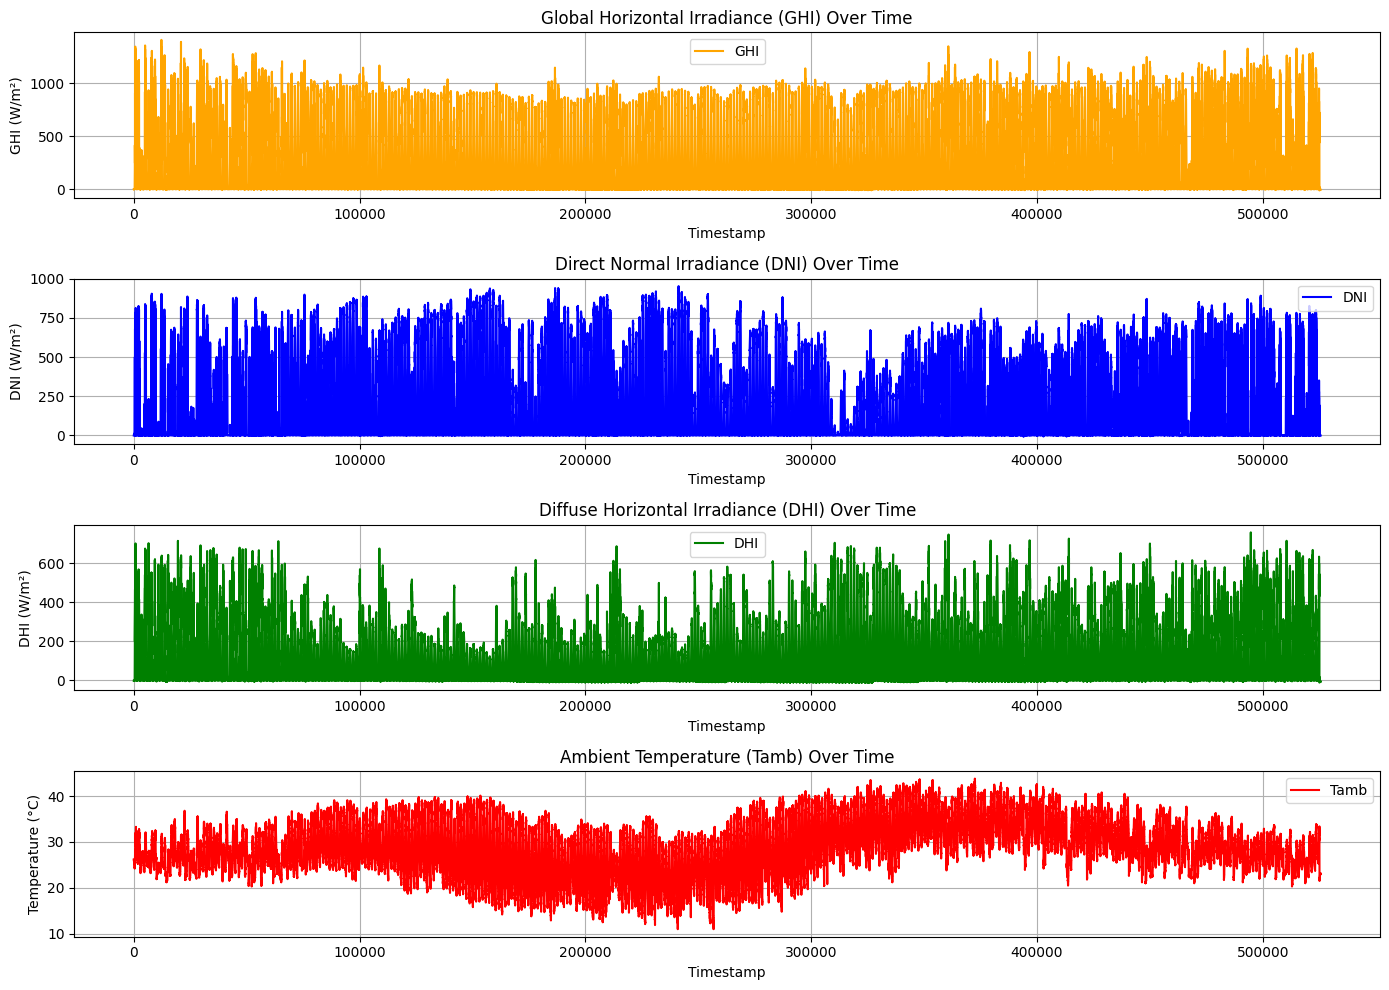

In [15]:

plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.legend()

# Plot DNI
plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.grid()
plt.legend()

# Plot DHI
plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.grid()
plt.legend()

# Plot Tamb
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

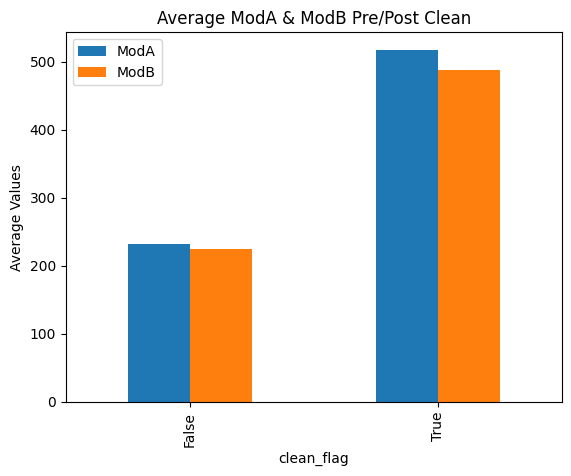

In [15]:
cleaned_data = df.groupby('clean_flag').mean()[['ModA', 'ModB']]
cleaned_data.plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Clean')
plt.ylabel('Average Values')
plt.show()

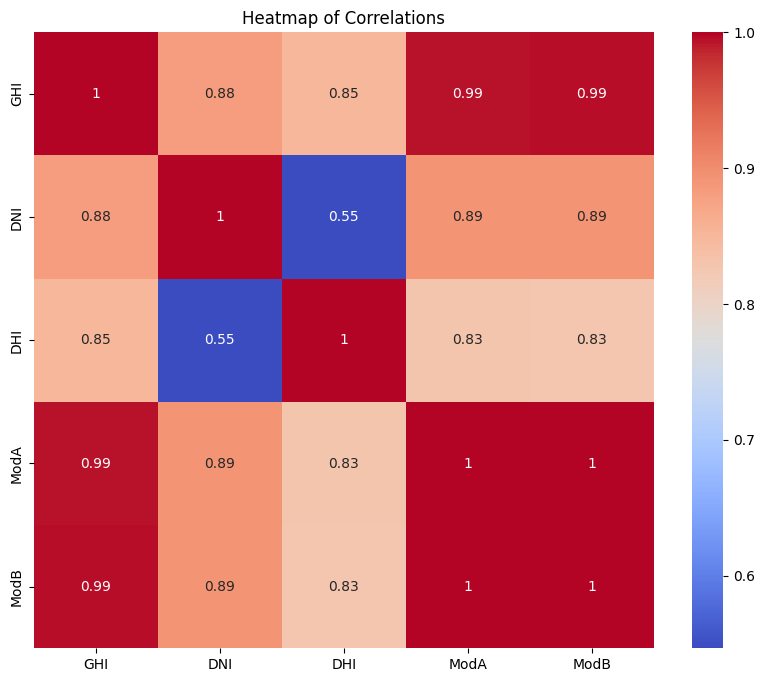

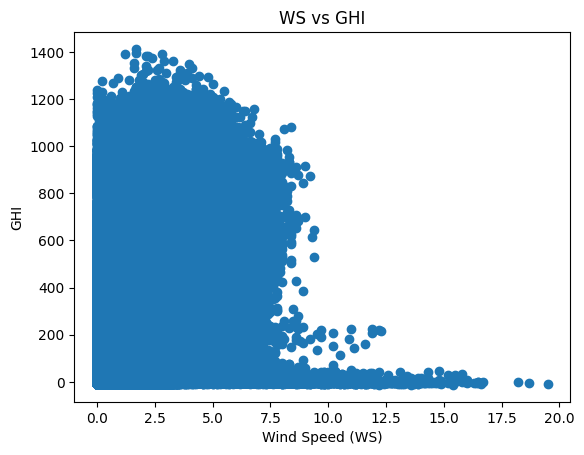

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()
plt.scatter(df['WS'], df['GHI'])
plt.title('WS vs GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.show()


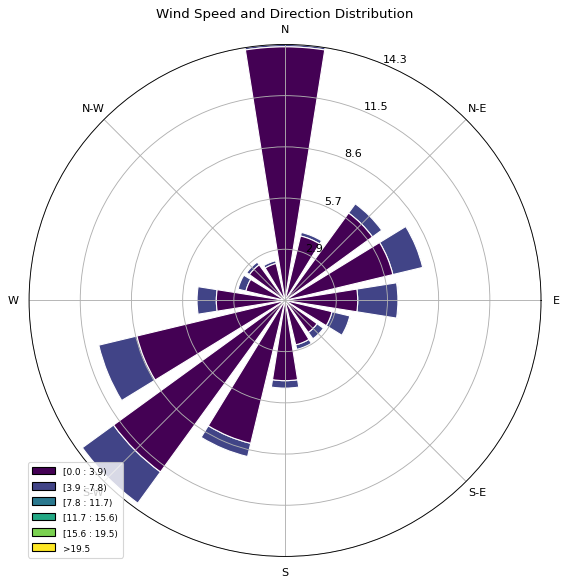

In [17]:
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Speed and Direction Distribution')
ax.set_legend()
plt.show()

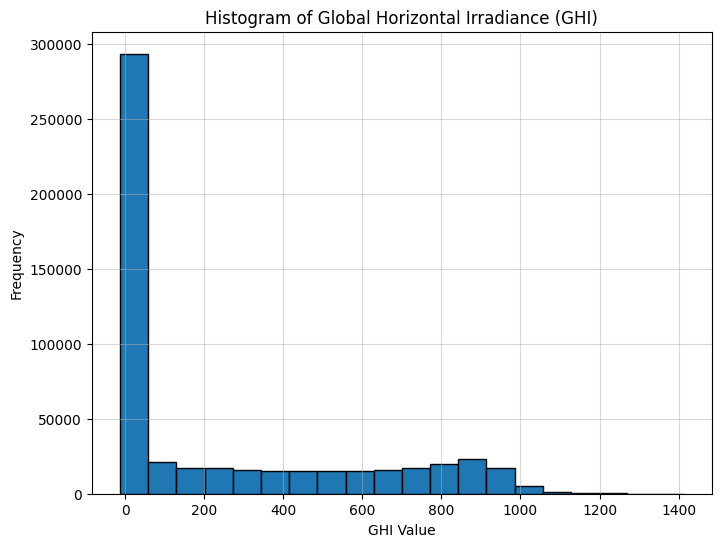

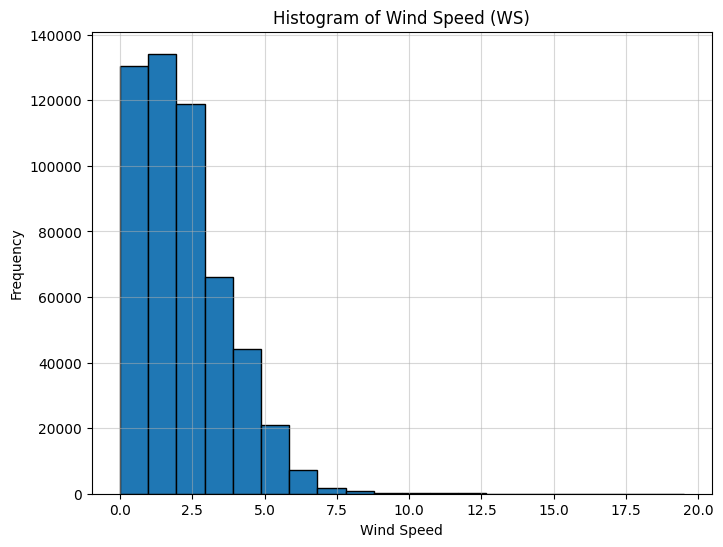

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['GHI'], bins=20, edgecolor='black')
plt.title('Histogram of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()
# Histogram for Wind Speed (WS)
plt.figure(figsize=(8, 6))
plt.hist(df['WS'], bins=20, edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()

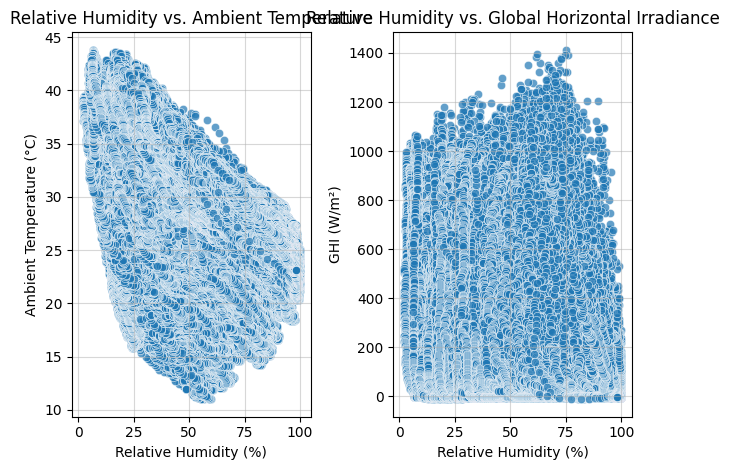

In [18]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.7)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, alpha=0.5)

plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.7)
plt.title('Relative Humidity vs. Global Horizontal Irradiance')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

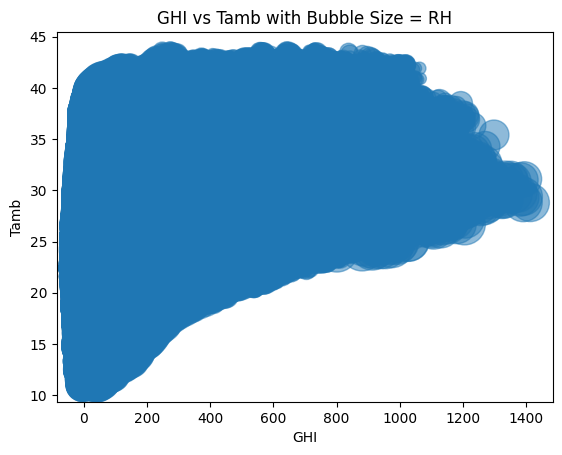

In [16]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs Tamb with Bubble Size = RH')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()


In [19]:
current_directory = os.getcwd()
print(f"Current directory: {current_directory}\n")

# List all files and directories in the current directory
print("Files and directories in the current directory:")
for item in os.listdir(current_directory):
    print(item)

Current directory: C:\10academy\solar-challenge-week1\notebooks

Files and directories in the current directory:
.ipynb_checkpoints
benin_eda.ipynb
data


In [22]:
df = pd.read_csv('data/sierraleone-bumbuna.csv')

In [10]:
summary_stats = df.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [23]:
print(df[['GHI', 'DNI', 'DHI']].isna().sum())

GHI    0
DNI    0
DHI    0
dtype: int64


In [24]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]))
df['clean_flag'] = (z_scores > 3).any(axis=1)

In [25]:
os.makedirs('data', exist_ok=True)

In [27]:
df.to_csv('data/sierraleone-bumbuna_clean.csv', index=False)

In [28]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

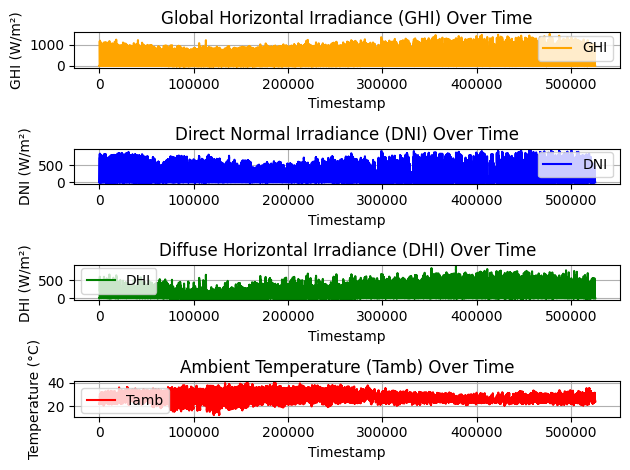

In [17]:
# Plot GHI
plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.legend()

# Plot DNI
plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.grid()
plt.legend()

# Plot DHI
plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.grid()
plt.legend()

# Plot Tamb
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


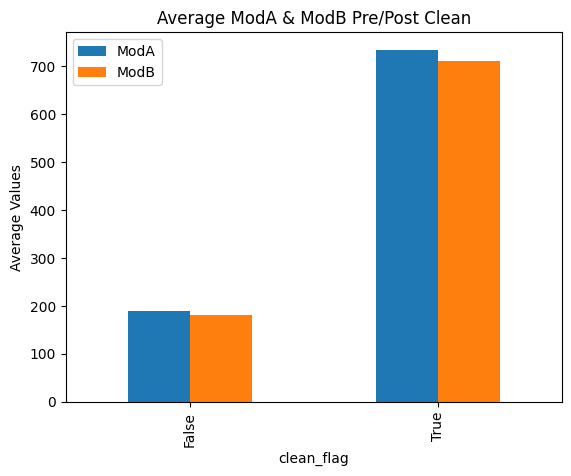

In [18]:
cleaned_data = df.groupby('clean_flag').mean()[['ModA', 'ModB']]
cleaned_data.plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Clean')
plt.ylabel('Average Values')
plt.show()

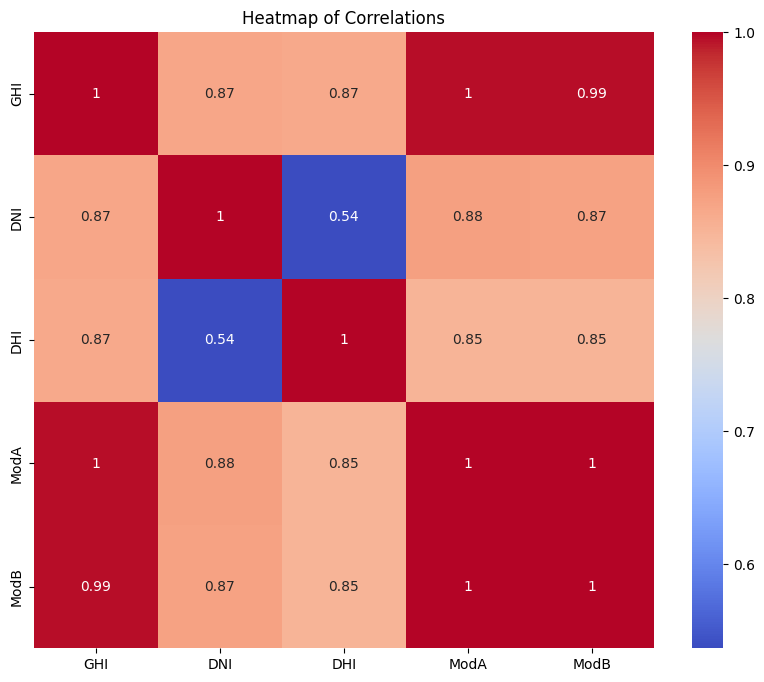

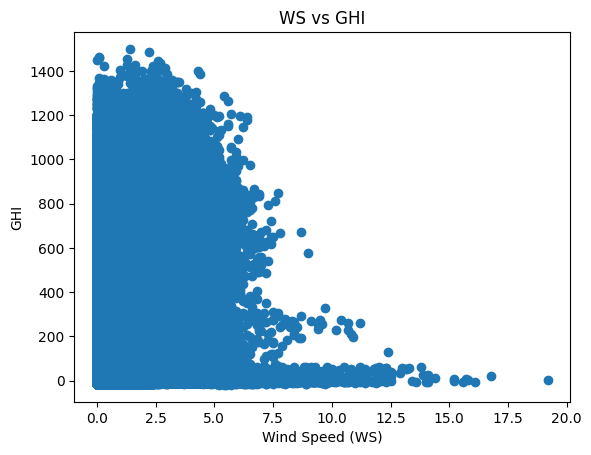

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()
plt.scatter(df['WS'], df['GHI'])
plt.title('WS vs GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.show()


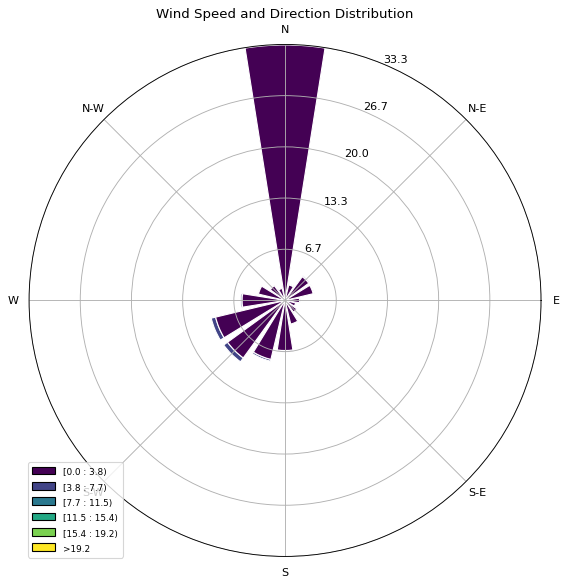

In [20]:
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Speed and Direction Distribution')
ax.set_legend()
plt.show()

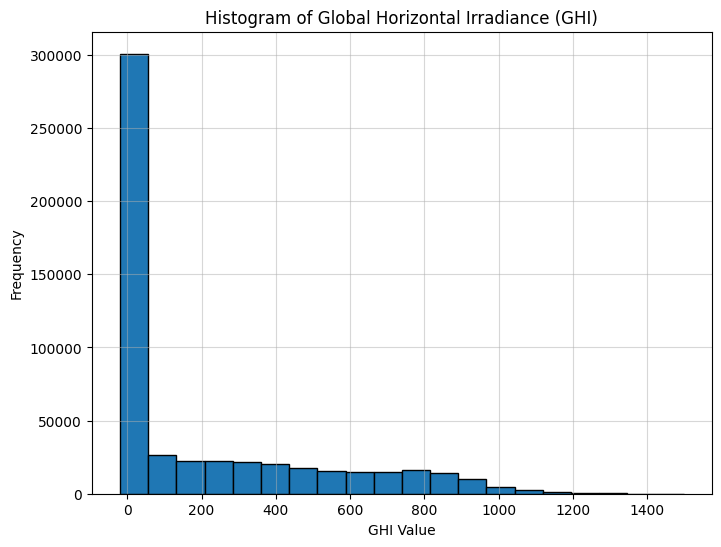

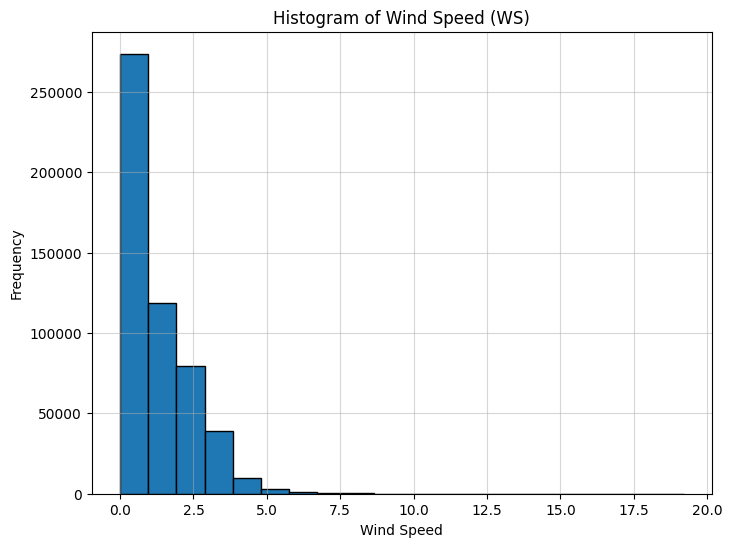

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['GHI'], bins=20, edgecolor='black')
plt.title('Histogram of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()
# Histogram for Wind Speed (WS)
plt.figure(figsize=(8, 6))
plt.hist(df['WS'], bins=20, edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()

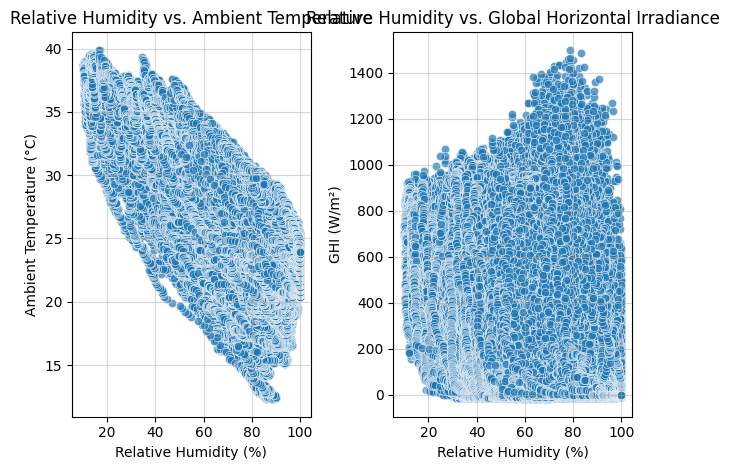

In [22]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.7)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, alpha=0.5)

plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.7)
plt.title('Relative Humidity vs. Global Horizontal Irradiance')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

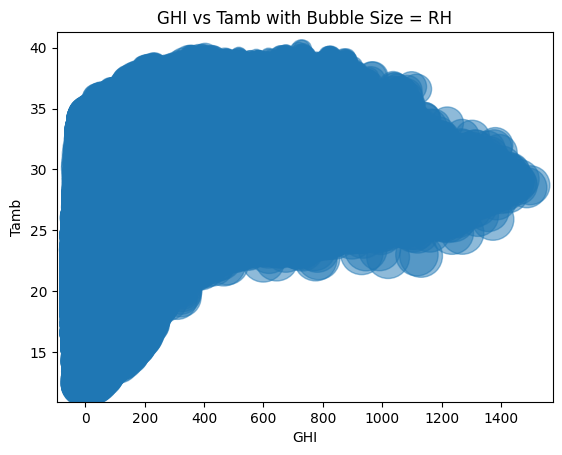

In [23]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs Tamb with Bubble Size = RH')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()

In [30]:
df = pd.read_csv('data/togo-dapaong_qc.csv')

In [26]:
summary_stats = df.describe()
print(summary_stats)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [31]:

empty_values = df.isna().sum()
high_missing = empty_values[empty_values > (0.05 * len(df))]
print(high_missing)



Comments    525600
dtype: int64


In [32]:
print(df[['GHI', 'DNI', 'DHI']].isna().sum())

GHI    0
DNI    0
DHI    0
dtype: int64


In [33]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]))
df['clean_flag'] = (z_scores > 3).any(axis=1)

In [34]:
os.makedirs('data', exist_ok=True)

In [35]:
df.to_csv('data/togo-dapaong_qc_clean.csv', index=False)

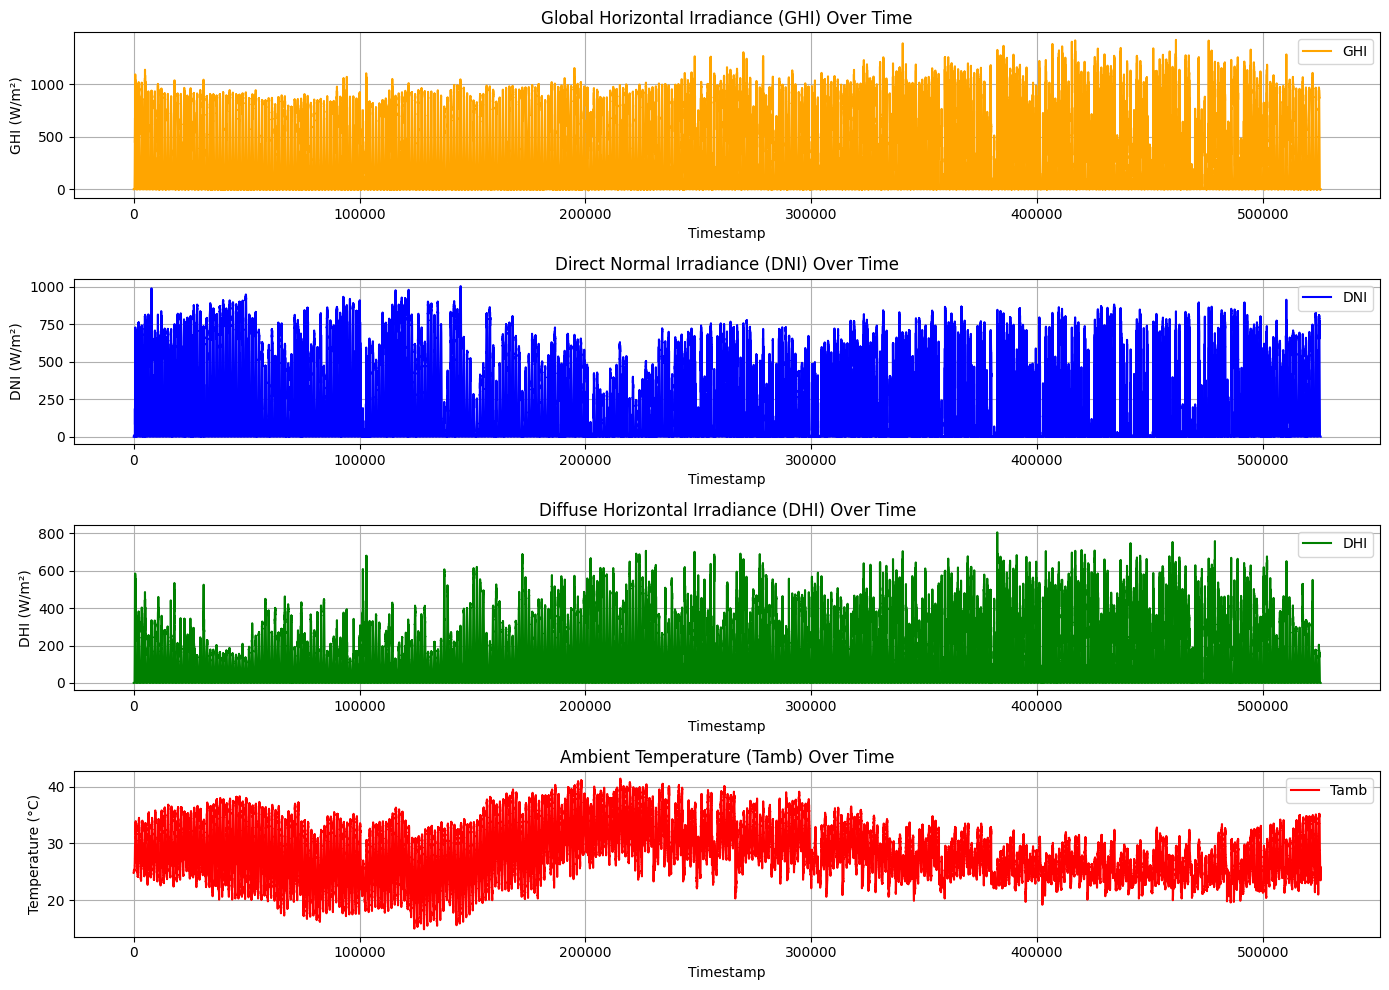

In [35]:
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.legend()

# Plot DNI
plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.grid()
plt.legend()

# Plot DHI
plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.grid()
plt.legend()

# Plot Tamb
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


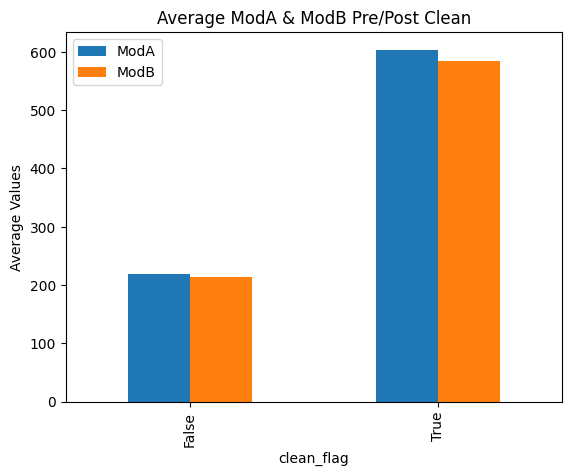

In [36]:
cleaned_data = df.groupby('clean_flag').mean()[['ModA', 'ModB']]
cleaned_data.plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Clean')
plt.ylabel('Average Values')
plt.show()


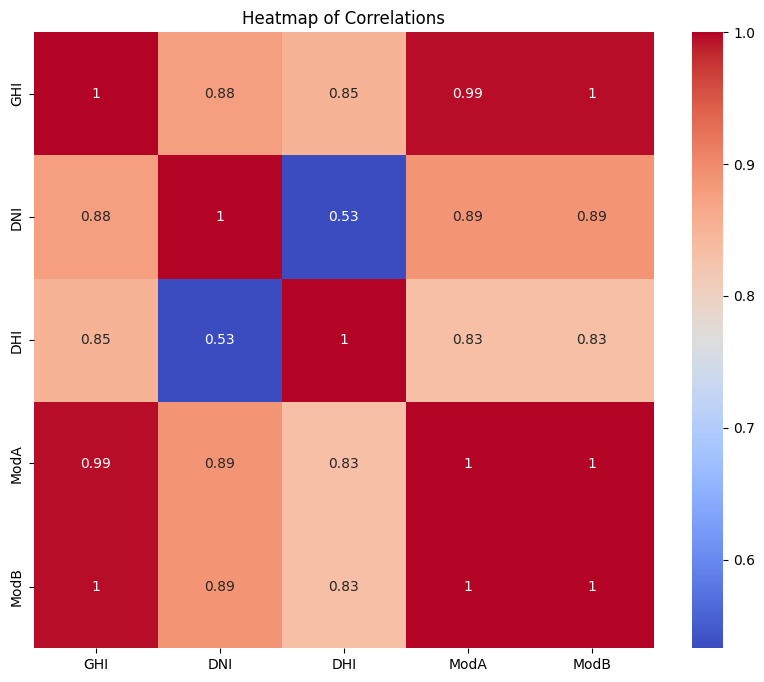

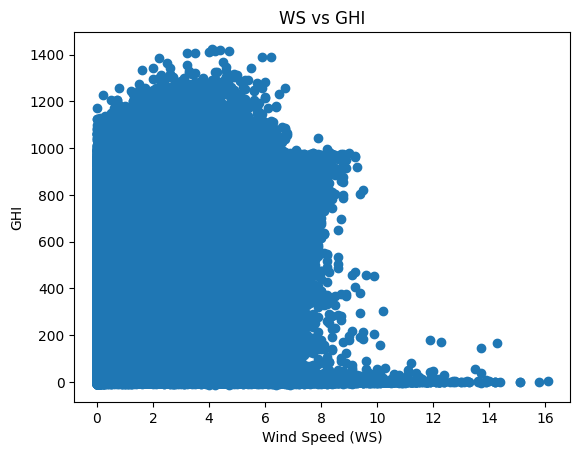

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()
plt.scatter(df['WS'], df['GHI'])
plt.title('WS vs GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.show()

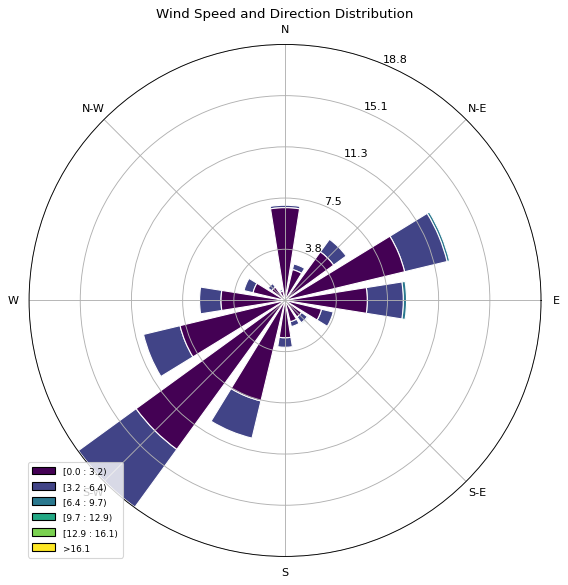

In [38]:
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Speed and Direction Distribution')
ax.set_legend()
plt.show()

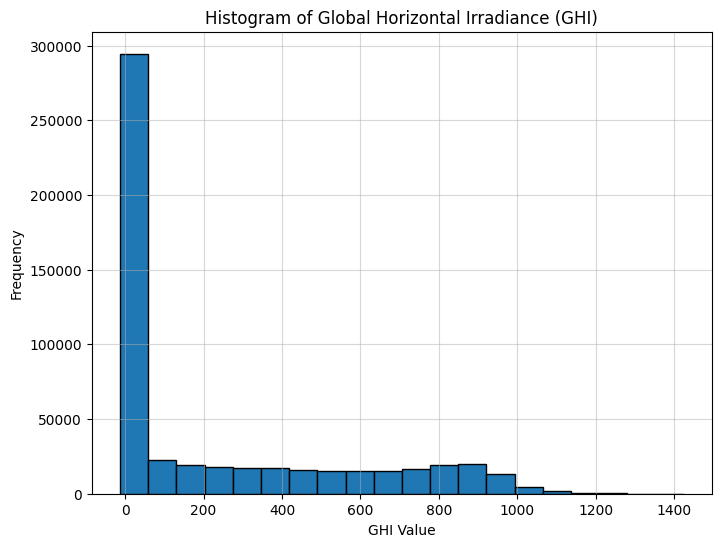

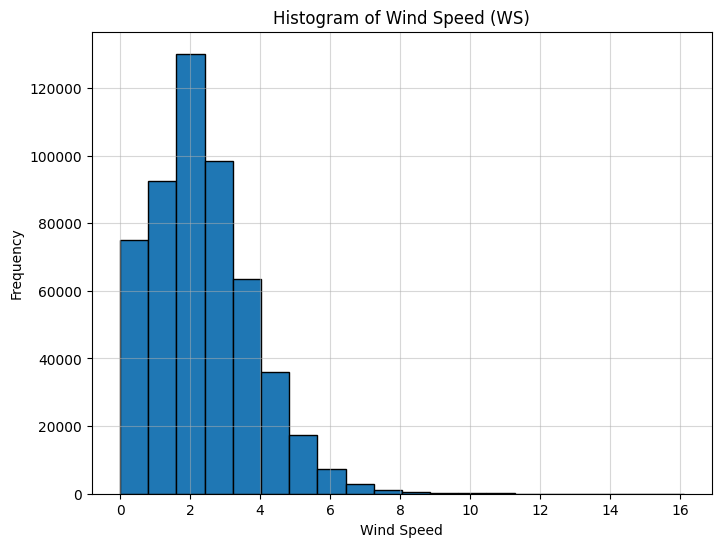

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(df['GHI'], bins=20, edgecolor='black')
plt.title('Histogram of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()
# Histogram for Wind Speed (WS)
plt.figure(figsize=(8, 6))
plt.hist(df['WS'], bins=20, edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()


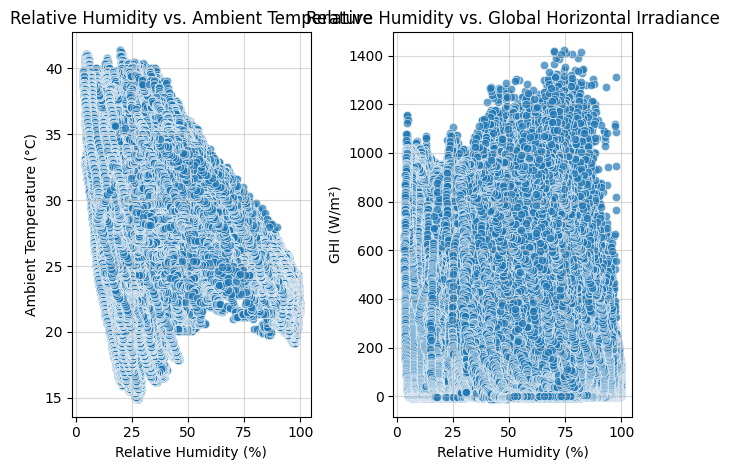

In [40]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.7)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, alpha=0.5)

plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.7)
plt.title('Relative Humidity vs. Global Horizontal Irradiance')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

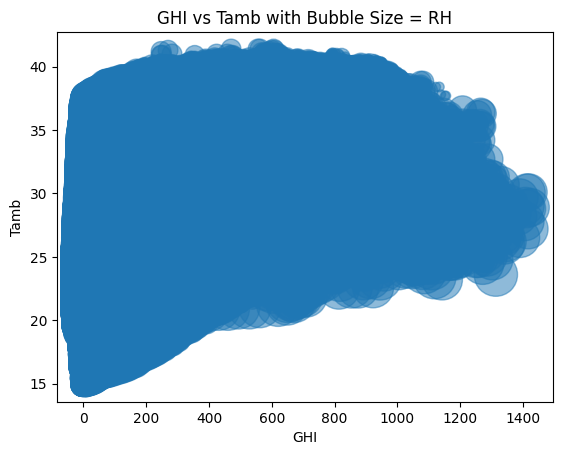

In [41]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs Tamb with Bubble Size = RH')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()